In [9]:
from __future__ import print_function
import collections

import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions

try:
    tf.compat.v1.enable_eager_execution()
except ValueError:
    pass

import matplotlib.pyplot as plt

# Normal distribution

In [11]:
n = tfd.Normal(loc=0., scale=1.)
print(n)
print(n.sample())
print(n.sample(3))

tfp.distributions.Normal("Normal", batch_shape=[], event_shape=[], dtype=float32)
tf.Tensor(0.0019717598, shape=(), dtype=float32)
tf.Tensor([ 0.87287337 -0.96089274 -0.32446525], shape=(3,), dtype=float32)


Evaluate log-probabilities:

In [12]:
print(n.log_prob(0.))
print(n.log_prob([0., 2., 4.]))

tf.Tensor(-0.9189385, shape=(), dtype=float32)
tf.Tensor([-0.9189385 -2.9189386 -8.918939 ], shape=(3,), dtype=float32)


# Bernoulli distribution

In [16]:
b = tfd.Bernoulli(probs=0.5)
print(b)
print(b.sample())
print(b.sample(8))

tfp.distributions.Bernoulli("Bernoulli", batch_shape=[], event_shape=[], dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor([1 0 0 1 1 0 0 1], shape=(8,), dtype=int32)


log-probabilities:

In [17]:
print(b.log_prob(1))
print(b.log_prob([0,1,0,1]))

tf.Tensor(-0.6931472, shape=(), dtype=float32)
tf.Tensor([-0.6931472 -0.6931472 -0.6931472 -0.6931472], shape=(4,), dtype=float32)


# Multivariate Normal distribution

In [19]:
nd = tfd.MultivariateNormalDiag(loc=[0., 10.], scale_diag=[1., 4.])
print(nd)
print(nd.sample())
print(nd.sample(5))

tfp.distributions.MultivariateNormalDiag("MultivariateNormalDiag", batch_shape=[], event_shape=[2], dtype=float32)
tf.Tensor([-1.7036997 10.409157 ], shape=(2,), dtype=float32)
tf.Tensor(
[[-0.1864698   6.0794315 ]
 [-0.606507    9.717038  ]
 [-0.74971014 10.488503  ]
 [ 0.45698676 16.530394  ]
 [ 0.42477697  1.0357666 ]], shape=(5, 2), dtype=float32)


log-probabilities for multivariate normal distribution:

In [20]:
nd.log_prob([0., 10])

<tf.Tensor: id=358, shape=(), dtype=float32, numpy=-3.2241714>

Full covariace-matrix:

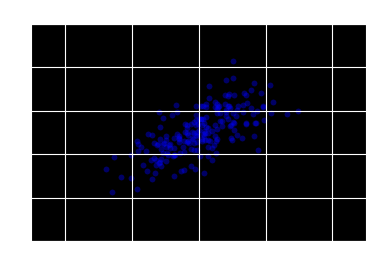

In [21]:
nd = tfd.MultivariateNormalFullCovariance(
    loc = [0., 5], covariance_matrix = [[1., .7], [.7, 1.]])
data = nd.sample(200)
plt.scatter(data[:, 0], data[:, 1], color='blue', alpha=0.4)
plt.axis([-5, 5, 0, 10])
plt.title("Data set")
plt.show()

# Multiple Bernoulli experiments

In [24]:
b3 = tfd.Bernoulli(probs=[.3, .5, .7])
print(b3)
print(b3.sample(5))
print(b3.prob([1, 1, 0]))
print(b3.log_prob([1, 1, 0]))

tfp.distributions.Bernoulli("Bernoulli", batch_shape=[3], event_shape=[], dtype=int32)
tf.Tensor(
[[1 0 1]
 [0 1 1]
 [1 1 1]
 [1 0 1]
 [0 0 1]], shape=(5, 3), dtype=int32)
tf.Tensor([0.29999998 0.5        0.29999998], shape=(3,), dtype=float32)
tf.Tensor([-1.2039728 -0.6931472 -1.2039728], shape=(3,), dtype=float32)


Evaluate one series of independent variables:

In [32]:
b3_joint = tfd.Independent(b3, reinterpreted_batch_ndims=1)
print(b3_joint)
print(b3_joint.prob([1, 1, 0]))   # all independent probabilities (b3.prob()) multiplied as given in the next line:
print(tf.reduce_prod(b3.prob([1, 1, 0])))

tfp.distributions.Independent("IndependentBernoulli", batch_shape=[], event_shape=[3], dtype=int32)
tf.Tensor(0.044999998, shape=(), dtype=float32)
tf.Tensor(0.044999994, shape=(), dtype=float32)


# Batch of multivariate distributions

In [44]:
nd_batch = tfd.MultivariateNormalFullCovariance(
    loc = [[0., 0.], [1., 1.], [2., 2.]],
    covariance_matrix = [[[1., .1], [.1, 1.]], 
                         [[1., .3], [.3, 1.]],
                         [[1., .5], [.5, 1.]]])
print(nd_batch)
print(nd_batch.sample(4))
print(nd_batch.log_prob([[0., 0.], [1., 1.], [2., 2.]]))

tfp.distributions.MultivariateNormalFullCovariance("MultivariateNormalFullCovariance", batch_shape=[3], event_shape=[2], dtype=float32)
tf.Tensor(
[[[-1.1490412   0.45698982]
  [ 1.432057    1.8871888 ]
  [ 3.7556992   2.0628035 ]]

 [[ 0.68792325 -0.35831434]
  [ 2.3963943   2.9983473 ]
  [ 3.0631561   1.4934293 ]]

 [[-0.12854612  0.775008  ]
  [ 0.32621896  1.1306397 ]
  [ 0.35264778  0.78691995]]

 [[-1.7665267  -0.19128998]
  [ 1.4226983  -0.04595745]
  [ 1.4762866   0.6333194 ]]], shape=(4, 3, 2), dtype=float32)
tf.Tensor([-1.8328519 -1.7907217 -1.694036 ], shape=(3,), dtype=float32)
